In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [82]:
def plot_energy_data(file_path, y_label, title, figsize=(15, 8), title_size=20, axes_label_size=14, tick_size=18, legend_size=18):
    # Charger les données
    data = pd.read_excel(file_path, sheet_name="NRJ")

    # Séparer les données en fonction de TYPFLUX
    residential_data = data[data["TYPFLUX"] == "Residential"].set_index("ENERGIE").drop(columns="TYPFLUX")
    tertiary_data = data[data["TYPFLUX"] == "Tertiary"].set_index("ENERGIE").drop(columns="TYPFLUX")

    # Définir une palette de couleurs distincte
    colors_palette = [
        '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
        '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
    ]

    # Liste des énergies uniques
    energies = data["ENERGIE"].unique()

    # Créer le graphique
    fig, ax = plt.subplots(figsize=figsize)
    bar_width = 0.35
    index = range(len(residential_data.columns))

    # Barres pour Résidentiel
    bottom = [0] * len(residential_data.columns)
    for idx, energy in enumerate(energies):
        if energy in residential_data.index:
            ax.bar(index, residential_data.loc[energy], bar_width, label=f"{energy} (Residential)", color=colors_palette[idx], bottom=bottom, edgecolor='white')
            bottom += residential_data.loc[energy]

    # Barres pour Tertiaire avec hachures et un espacement augmenté
    bottom = [0] * len(tertiary_data.columns)
    for idx, energy in enumerate(energies):
        if energy in tertiary_data.index:
            ax.bar([i+bar_width + 0.05 for i in index], tertiary_data.loc[energy], bar_width, label=f"{energy} (Tertiary)", color=colors_palette[idx], alpha=0.6, bottom=bottom, edgecolor='white', hatch='//')
            bottom += tertiary_data.loc[energy]

    # Configurer les étiquettes et la légende avec les tailles spécifiées
    #ax.set_xlabel('Années', fontsize=axes_label_size)
    ax.set_ylabel(y_label, fontsize=18, fontweight='bold')
    #ax.set_title(title, fontsize=title_size, fontweight='bold', pad=20)
    ax.set_xticks([i + bar_width + 0.025 for i in range(len(residential_data.columns))])  # Adjusted for the increased spacing
    ax.set_xticklabels(residential_data.columns, fontsize=tick_size)
    ax.tick_params(axis='y', labelsize=tick_size)

    # Légendes avec les tailles spécifiées
    energy_legends = [Patch(facecolor=colors_palette[idx], edgecolor='white', label=energy) for idx, energy in enumerate(energies)]
    custom_legends = [Patch(facecolor='white', edgecolor='black', label='Residential'), 
                      Patch(facecolor='white', edgecolor='black', alpha=0.6, hatch='//', label='Tertiary')]
    ax.legend(handles=custom_legends + energy_legends, loc="upper left", bbox_to_anchor=(1,1), prop={'size': legend_size})

    # Afficher le graphique
    plt.tight_layout()
    plt.show()

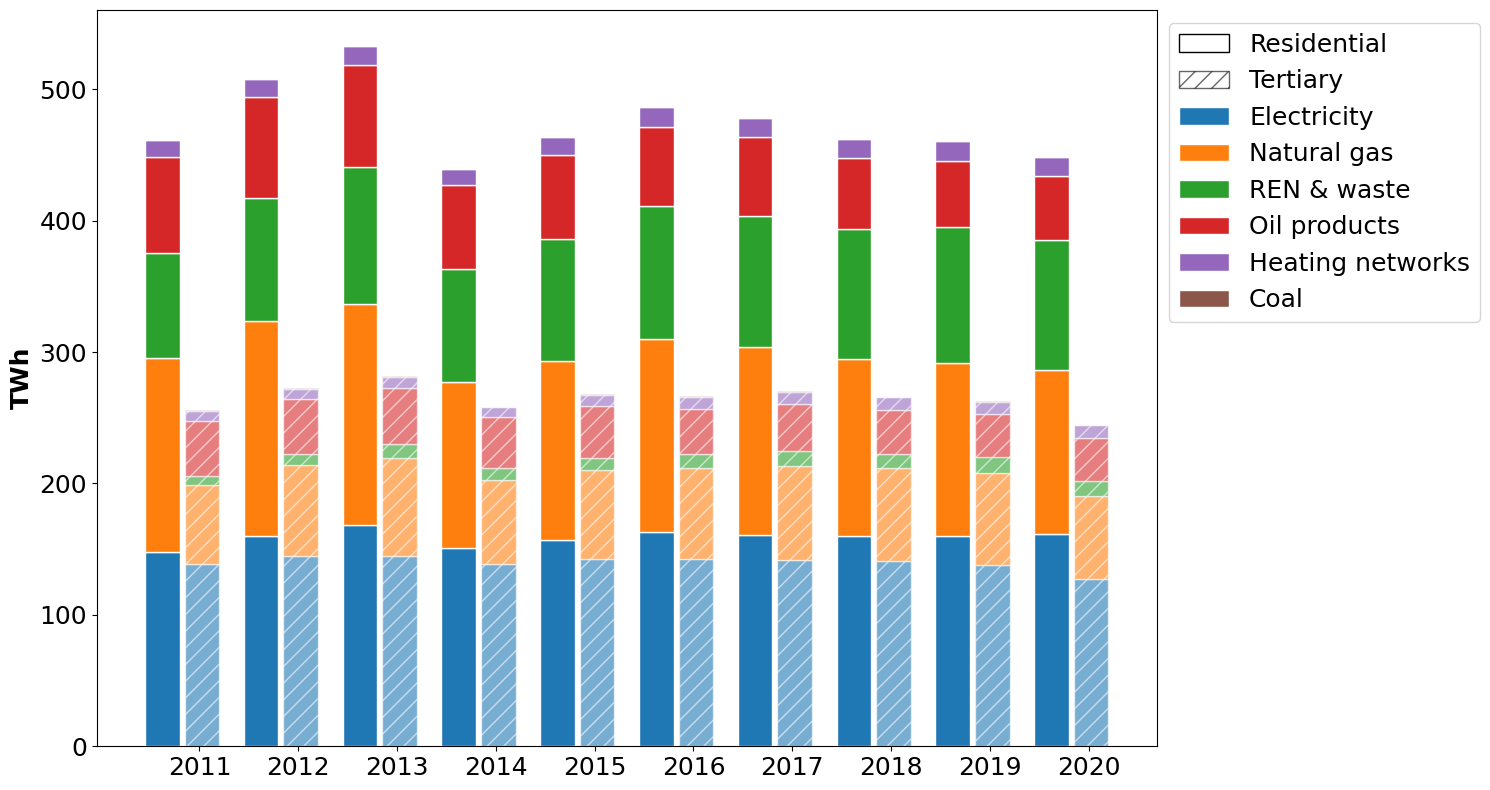

In [83]:
# Example of using the function with default parameters
plot_energy_data("test.xlsx", "TWh", "Energy consumption for residential and tertiary buildings")

In [86]:
def plot_ghge_data(file_path, y_label, title, figsize=(15, 8), title_size=20, axes_label_size=14, tick_size=18, legend_size=18):
    # Charger les données
    data = pd.read_excel(file_path, sheet_name="CO2")

    # Séparer les données en fonction de TYPFLUX
    residential_data = data[data["TYPFLUX"] == "Residential"].set_index("ENERGIE").drop(columns="TYPFLUX")
    tertiary_data = data[data["TYPFLUX"] == "Tertiary"].set_index("ENERGIE").drop(columns="TYPFLUX")

    # Définir une palette de couleurs distincte
    colors_palette = [
        '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
        '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#333333' 
    ]

    # Liste des énergies uniques
    energies = data["ENERGIE"].unique()

    # Créer le graphique
    fig, ax = plt.subplots(figsize=figsize)
    bar_width = 0.35
    index = range(len(residential_data.columns))

    # Barres pour Résidentiel
    bottom = [0] * len(residential_data.columns)
    for idx, energy in enumerate(energies):
        if energy in residential_data.index:
            ax.bar(index, residential_data.loc[energy], bar_width, label=f"{energy} (Residential)", color=colors_palette[idx], bottom=bottom, edgecolor='white')
            bottom += residential_data.loc[energy]

    # Barres pour Tertiaire avec hachures et un espacement augmenté
    bottom = [0] * len(tertiary_data.columns)
    for idx, energy in enumerate(energies):
        if energy in tertiary_data.index:
            ax.bar([i+bar_width + 0.05 for i in index], tertiary_data.loc[energy], bar_width, label=f"{energy} (Tertiary)", color=colors_palette[idx], alpha=0.6, bottom=bottom, edgecolor='white', hatch='//')
            bottom += tertiary_data.loc[energy]

    # Configurer les étiquettes et la légende avec les tailles spécifiées
    #ax.set_xlabel('Années', fontsize=axes_label_size)
    ax.set_ylabel(y_label, fontsize=18, fontweight='bold')
    #ax.set_title(title, fontsize=title_size, fontweight='bold', pad=20)
    ax.set_xticks([i + bar_width + 0.025 for i in range(len(residential_data.columns))])  # Adjusted for the increased spacing
    ax.set_xticklabels(residential_data.columns, fontsize=tick_size)
    ax.tick_params(axis='y', labelsize=tick_size)

    # Légendes avec les tailles spécifiées
    energy_legends = [Patch(facecolor=colors_palette[idx], edgecolor='white', label=energy) for idx, energy in enumerate(energies)]
    custom_legends = [Patch(facecolor='white', edgecolor='black', label='Residential'), 
                      Patch(facecolor='white', edgecolor='black', alpha=0.6, hatch='//', label='Tertiary')]
    ax.legend(handles=custom_legends + energy_legends, loc="upper left", bbox_to_anchor=(1,1), prop={'size': legend_size})

    # Afficher le graphique
    plt.tight_layout()
    plt.show()

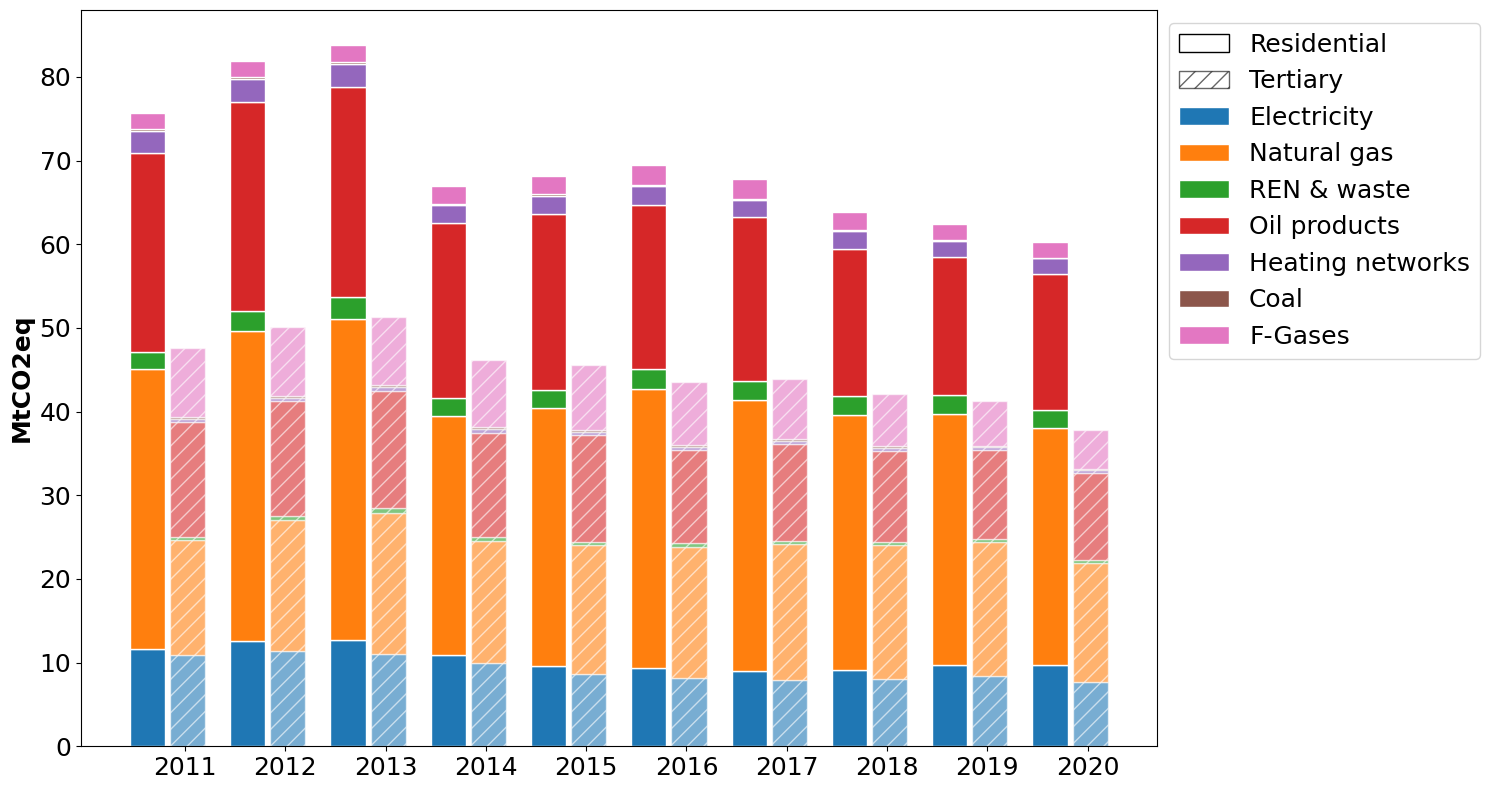

In [87]:
# Example of using the function with default parameters
plot_ghge_data("test.xlsx", "MtCO2eq", "Operational GHGE for residential and tertiary buildings")